# Percolación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

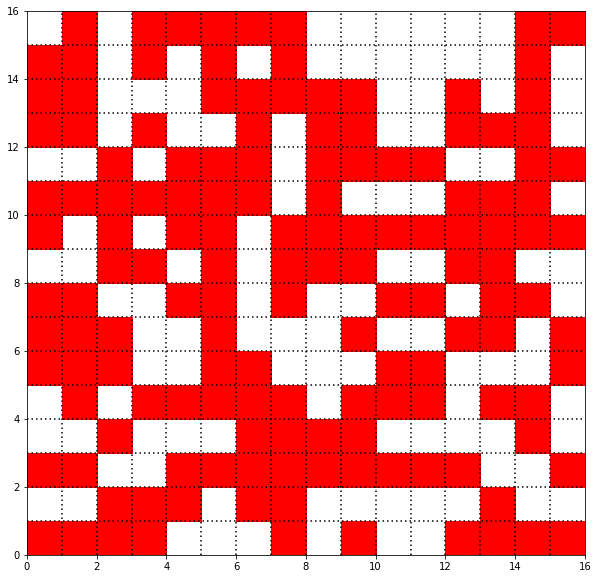

In [2]:
L = 16
N = L*L
p = 0.6

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0,L)
ax.set_ylim(0,L)
for i in range(L):
    for j in range(L):
        if np.random.random() < p:
            rect = plt.Rectangle((i, j), 1, 1, color='r')
            ax.add_patch(rect)
for i in range(1,L):
    ax.axhline(i,color='black',dashes=(1, 2),zorder=1)
    ax.axvline(i,color='black',dashes=(1, 2),zorder=1)
plt.show()

# Explicación del algoritmo de Newmann y Ziff

In [3]:
import numpy as np
import random

global L, N, empty, ptr, nn, order

L=4
N=L**2
empty=-(N+1)

parent=np.zeros(N, dtype=int)               # array of pointers
nn=np.zeros((N, 4), dtype=int)           # nearest neighbors
order=np.zeros(N, dtype=int)             # occupation number

## 1. Precomputar el orden de ocupación
#### LLenar order[]

In [4]:
# Generating the random orders of site occupation
def permutation():
    global order,N
    j=0
    temp=0
    for i in range(N):
        order[i]=i #Inicializa order 
    for i in range(N):
        j=random.randrange(i,N) 
        temp=order[i]   #intercambia oreder[i] con order[j]
        order[i]=order[j]
        order[j]=temp

In [5]:
print(order)
permutation()
print(order)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[11  6 10 12  8  0 15 14  3  5  1 13  7  4  2  9]


#### Utilizando numpy

In [6]:
def permutation():
    global order,N
    order = np.random.permutation(N)

In [7]:

permutation()
print(order)

[ 0 10  7  8  3 13 14  5  6 12  2  9 15 11  4  1]


## 2. Establecer los vecinos de cada sitio
#### LLenar nn[s,j]

In [8]:
# Setting the boundaries no PBC utilizando case, no hay vecino EMPTY
def vecino(s,j):
    global L,empty
    
    if j == 0: #izquierda
        if s%L ==0:
            return empty
        else:
            return s-1
    elif j==1: #derecha
        if s%L == L-1:
            return empty
        else:
            return s+1
    elif j==2: #arriba
        if s//L == 0:
            return empty
        else:
            return s-L
    elif j==3: #abajo
        if s//L == L-1:
            return empty
        else:
            return s+L
                
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

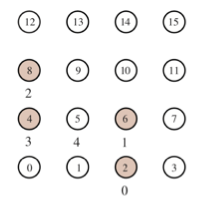

In [9]:
boundaries()
print(nn)

[[-17   1 -17   4]
 [  0   2 -17   5]
 [  1   3 -17   6]
 [  2 -17 -17   7]
 [-17   5   0   8]
 [  4   6   1   9]
 [  5   7   2  10]
 [  6 -17   3  11]
 [-17   9   4  12]
 [  8  10   5  13]
 [  9  11   6  14]
 [ 10 -17   7  15]
 [-17  13   8 -17]
 [ 12  14   9 -17]
 [ 13  15  10 -17]
 [ 14 -17  11 -17]]


## 3. Añadir sitios de acuerdo a un orden predeterminado

## 4. Determinar los clusters

### Encontrar la raiz

#### Forma recursiva

In [10]:
# Find operation de la raiz
def findrootR(s):
    global parent
    if parent[s] < 0:
        return s
    else:
        parent[s] = findrootR(parent[s])
    return parent[s]

#### Formas no recursivas

In [11]:
# Find operation de la raiz, versión no recursiva, no se cambian los ptr.
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

### Unir dos clusters

#### No recursiva

In [12]:
#union de raíces (clusters), version no recursiva
def mergeroots(r1,r2):
    global parent
    if r1 == r2: #Pertenecen al mismo cluster
        return r1
    elif -parent[r1] > -parent[r2]: #Cluster 1 > Cluster 2. La raiz pasa a ser la de 1 
        parent[r1] += parent[r2]
        parent[r2] = r1
        return r1
    else:
        parent[r2] += parent[r1] #Cluster 2 > Cluster 1. La raiz pasa a ser la de 2
        parent[r1] = r2
        return r2       

#### Recursiva

In [13]:
#union de raíces

def mergerootsR(r1,r2):
    global parent
    if r1==r2:#Cluster 1 > Cluster 2. La raiz pasa a ser la de 1 
        return r1
    elif -parent[r1] < -parent[r2]:
        mergerootsR(r2,r1)
    else:
        parent[r1]+=parent[r2] #Sale cuando el cluster 1 es mayor que el 2
        parent[r2] = r1
        return r1

## 5. El algoritmo de percolación

In [14]:
def percolate():
    global order, N, parent, nn, empty
    BIG = []
    big=0
    
    for i in range(N): parent[i]=empty
    #parent = empty*np.ones(N)
    
    for i in range(N):
        r1=s1=order[i]  #Es a la vez sitio y raiz
        parent[s1] = -1  #El tamño del cluster es 1
                
        for j in range(4):
            s2=nn[s1, j]
            if s2 != empty:  #El sitio no es vacío
                if parent[s2] != empty: #El sitio pertenece a un cluster
                    r1 = mergeroots(r1,findroot(s2)) #nueva raiz del sitio s
                    if -parent[r1]>big: big=-parent[r1] #ve si el cluster es más grande que big
        BIG.append(big)

    return np.array(BIG)

## Corrida

In [15]:
#Datos, inicalizaciones  y corridas
import numpy as np
import random
import matplotlib.pyplot as plt

global L, N, empty, parent, nn, order

L = 256
N = L**2
order=np.zeros(N, dtype=int) 
empty=-(N+1)
parent=np.zeros(N, dtype=int)               # array of pointers
nn=np.zeros((N, 4), dtype=int)           # nearest neighbors

permutation()
boundaries()
BIG = percolate()

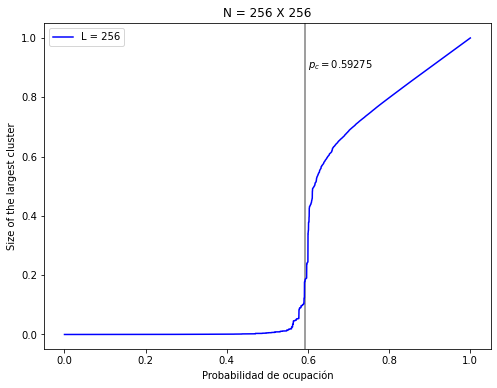

In [16]:
p = np.array(range(1,N+1))/N
BIG = BIG/N
plt.figure(figsize=(8,6))
plt.plot(p, BIG, 'b-',label = "L = {}".format(L))
plt.xlabel("Probabilidad de ocupación")
plt.ylabel("Size of the largest cluster")
plt.title("N = {} X {}".format(L,L))
plt.axvline(0.59275,color = "gray",zorder=-1)
plt.text(0.6,0.9*BIG.max(),r'$p_c = 0.59275$')
plt.legend()
plt.show()

## El aglomerado expandido y la probabilidad de percolación

In [17]:
import numpy as np
import matplotlib.pyplot as plt

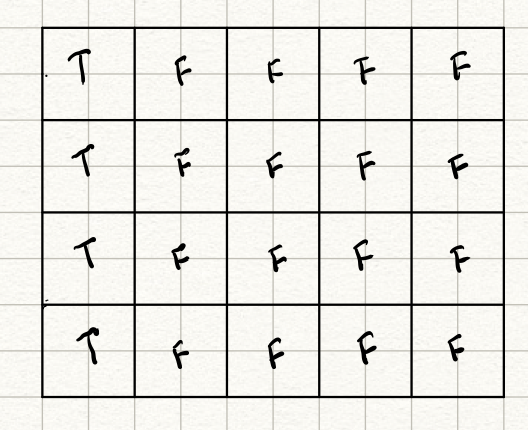

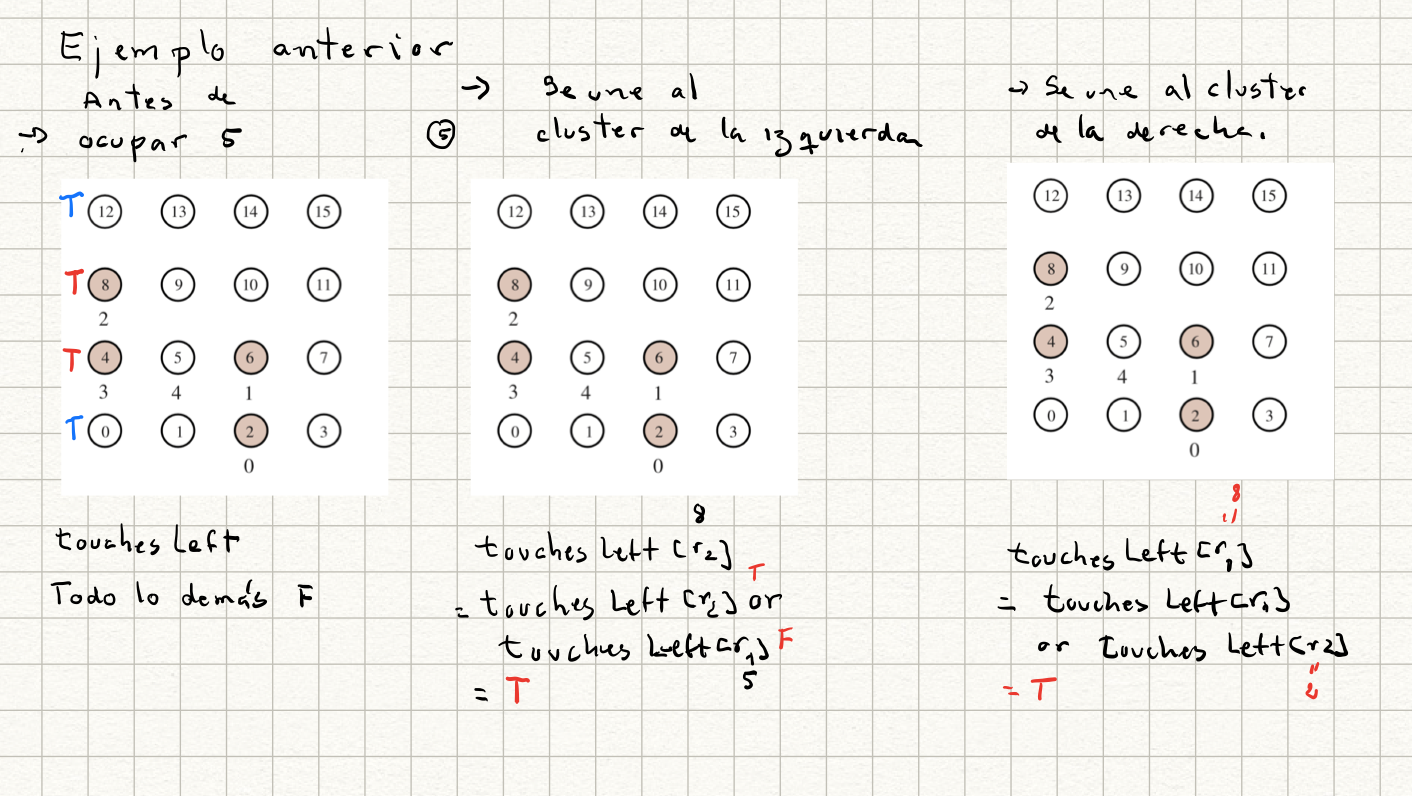

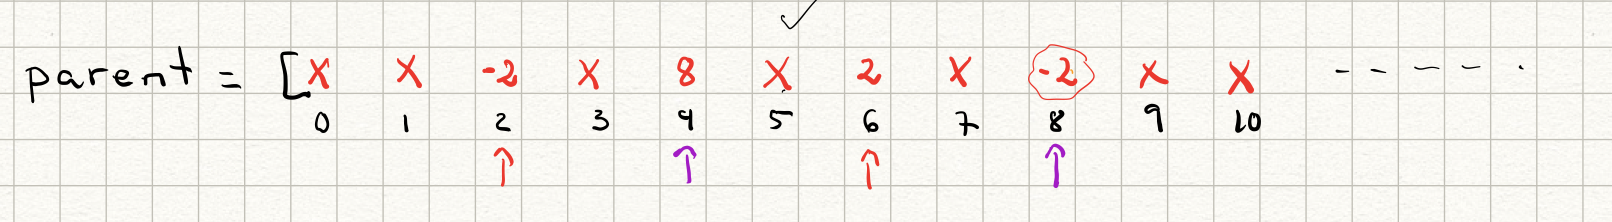

### Rutinas similares a la anterior

In [18]:
def permutation():
    global order,N
    order = np.random.permutation(N)

# Setting the boundaries no PBC utilizando case, no hay vecino EMPTY
def vecino(s,j):
    global L,empty
    
    if j == 0: #izquierda
        if s%L ==0:
            return empty
        else:
            return s-1
    elif j==1: #derecha
        if s%L == L-1:
            return empty
        else:
            return s+1
    elif j==2: #abajo
        if s//L == 0:
            return empty
        else:
            return s-L
    elif j==3: #arriba
        if s//L == L-1:
            return empty
        else:
            return s+L
                
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

# Find operation de la raiz, versión no recursiva, no se cambian los ptr.
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

### Funciones con cambio

In [19]:
#union de raíces (clusters), version no recursiva
def mergeroots(r1,r2):
    global spanclussize,parent,touchesLeft,touchesRight
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        parent[r1] += parent[r2]
        parent[r2] = r1
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1 
    else:
        parent[r2] += parent[r1]
        parent[r1] = r2
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2        

In [20]:
def percolate():
    global spanclussize,order,parent,nn
    BIG = []
    PSpan = []
    big=0
    spanclussize = 0
    
    for i in range(N): parent[i]=empty    

    for i in range(N):
        r1=s1=order[i]
        parent[s1] = -1
                
        for j in range(4):
            s2=nn[s1, j]
            if s2 != empty:
                if parent[s2] != empty:
                    r1 = mergeroots(r1,findroot(s2))
                    if -parent[r1]>big: big=-parent[r1]
        BIG.append(big)
        PSpan.append(spanclussize/(i+1.))

    return np.array(BIG), np.array(PSpan)

In [21]:
#Datos, inicalizaciones  y corridas
global L, N, empty, parent, nn, order, spanclussize,touchesLeft,touchesRight

L = 256
N = L**2
order=np.zeros(N, dtype=int) 
empty=-(N+1)
parent=np.zeros(N, dtype=int)               # array of pointers
nn=np.zeros((N, 4), dtype=int)           # nearest neighbors
touchesLeft =  [i%L == 0 for i in range(N)]
touchesRight = [i%L == L-1 for i in range(N)]

permutation()
boundaries()

BIG, PSpan = percolate()
Prob = np.copy(PSpan)
Prob[PSpan > 0]= 1

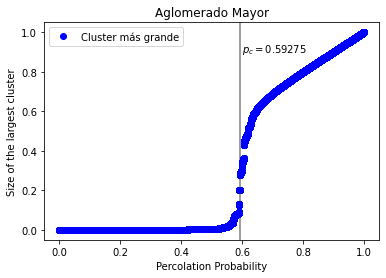

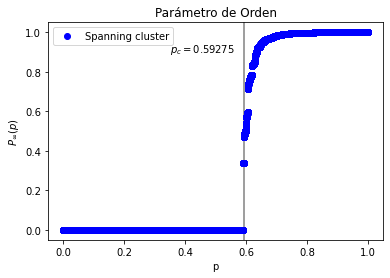

In [22]:
p = np.array(range(1,N+1))/N
BIG = BIG/N
plt.plot(p, BIG, 'bo',label = "Cluster más grande")
plt.xlabel("Percolation Probability")
plt.ylabel("Size of the largest cluster")
plt.title("Aglomerado Mayor")
plt.axvline(0.59275,color = "gray",zorder=-1)
plt.text(0.6,0.9*BIG.max(),r'$p_c = 0.59275$')
plt.legend()
plt.show()
    
plt.plot(p, PSpan, 'bo',label = "Spanning cluster")
plt.xlabel("p")
plt.ylabel(r'$P_\infty(p)$')
plt.title("Parámetro de Orden")
plt.axvline(0.59275,color = "gray",zorder=-1)
plt.text(0.35,0.9,r'$p_c = 0.59275$')
plt.legend()
plt.show()

## Distribución de tamaño de clusters en $p_c$

In [23]:
import numpy as np
import matplotlib.pyplot as plt

### Rutinas similares a la anterior

In [24]:
def permutation():
    global order,N
    order = np.random.permutation(N)

# Setting the boundaries no PBC utilizando case, no hay vecino EMPTY
def vecino(s,j):
    global L,empty
    
    if j == 0: #izquierda
        if s%L ==0:
            return empty
        else:
            return s-1
    elif j==1: #derecha
        if s%L == L-1:
            return empty
        else:
            return s+1
    elif j==2: #abajo
        if s//L == 0:
            return empty
        else:
            return s-L
    elif j==3: #arriba
        if s//L == L-1:
            return empty
        else:
            return s+L
                
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

# Find operation de la raiz, versión no recursiva, no se cambian los ptr.
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

### Rutinas nuevas

In [25]:
def mergeroots(r1,r2):
    global spanclussize,parent,ns,touchesLeft,touchesRight
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        parent[r1] += parent[r2]
        parent[r2] = r1
        ns[-parent[r1]] += 1
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1 
    else:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        parent[r2] += parent[r1]
        parent[r1] = r2
        ns[-parent[r2]] += 1
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2        

In [26]:
def percolate():
    global spanclussize,order,parent,nn,ns,ipc

    PSpan = []
    spanclussize = 0
    ns = np.zeros(N+1,dtype = int)
    nspcpar = np.zeros(N+1,dtype = int)
    parent = empty*np.ones(N,dtype=int)    

    for i in range(N):
        r1=s1=order[i]
        parent[s1] = -1
        ns[1] += 1       
        for j in range(4):
            s2=nn[s1, j]
            if s2 != empty:
                if parent[s2] != empty:
                    r1 = mergeroots(r1,findroot(s2))
        PSpan.append(spanclussize/(i+1.))
        if i == ipc:
            nspcpar  = np.copy(ns)        

    return np.array(PSpan),nspcpar

In [27]:
#Datos, inicalizaciones  y corridas
global L, N, empty, parent, nn, order, spanclussize,ipc,touchesLeft,touchesRight

pc = 0.59275
L = 1024
N = L**2
empty=-(N+1)
nn=np.zeros((N, 4), dtype=int)           # nearest neighbors

ipc = int(N*pc)
        
touchesLeft =  [i%L == 0 for i in range(N)]
touchesRight = [i%L == L-1 for i in range(N)]

permutation()
boundaries()
PSpan,nspc = percolate()
nspc = nspc[1:]/N 

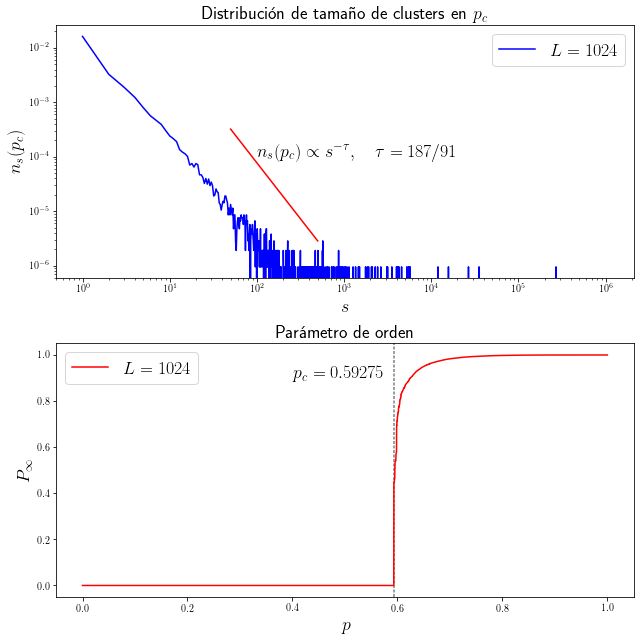

In [28]:
s = np.arange(1,N+1)
p = np.arange(1,N+1)/N

colors = ['b','r','g','m','C0','C1','C2','C3','C4','C5','C6']
fig = plt.figure(figsize = (9,9))
plt.rc('text', usetex=True) # Use with Latex
ax2 = fig.add_subplot(2,1,1)
ax2.loglog(s, nspc, color = colors[0],label = r"$L = {}$".format(L))
ax2.set_xlabel(r"$s$",fontsize = 18)
ax2.set_ylabel(r"$n_s(p_c)$",fontsize = 18)
ax2.set_title("Distribución de tamaño de clusters en $p_c$",fontsize = 18)
steor = np.arange(50,500)
nsteor = steor**(-187/91)
plt.plot(steor,nsteor,'r-')
plt.text(100,0.0001,r'$n_s(p_c) \propto s^{-\tau}, \quad \tau = 187/91$',fontsize = 18)
ax2.legend(fontsize = 18)

ax3 = fig.add_subplot(2,1,2)
ax3.plot(p, PSpan, color = colors[1],label = r"$L = {}$".format(L))
ax3.set_xlabel(r"$p$",fontsize = 18)
ax3.set_ylabel(r"$P_\infty$",fontsize = 18)
ax3.set_title("Parámetro de orden",fontsize = 18)
ax3.axvline(0.59275,color = "gray",dashes = (2,1),zorder=-1)
ax3.text(0.4,0.9,r'$p_c = 0.59275$' ,fontsize = 18)
ax3.legend(fontsize = 18)

fig.tight_layout()
plt.show()
